# Estimator API

Estimator API refers to the common interface used by all machine learning models and algorithms

Ensabling different algorithms interference to be easily used,tuned and valudated, regardless of the specific model you'ar using

An Estimator is any object that can learn from data:

Classification (e.g: `KNeighborsClassifier`,`RandomForestClassifier`)

Regression (e.g: `LinearRegression`, `KNeighborsRegressor`)

Clustering(e.g: `KMeans`,`DBSCAN`)

Dimensionality Reduction(e.g: `PCA`, `TruncatedSVD`)

Transformaers(e.g: `StandardScaler`, `OneHotEncoder`)

## Key Componenets of the Estimator API:
- `fit() Method`
- `predict() Method`
- `score()` Method: Used to evaluate the performance of a model
- `get params()` and `set params()` methods allows us to inpect and modify the hyperparameters of a model

## Why Estimator concept?
1. Consistency: provides uniform inteface across all sckit-learn models, making it easier to switch between different algorithms
2. Tuning: `set_params()` and `get_params()` methods allow you to tune the hyperparameters of any estimator in a consistent way, which is important for hyperparameter optimization
3. Pipeline Integration: Scikit-learn's Pipelines make use of the Estimator API, allowing you to chain multiple preprocessing steps and models together into a single workflow 

# Supervised Learning in `sklearn`

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
#random data for linear regression
rng = np.random.RandomState(35)
x = 10 * rng.rand(40) #generate 40 random x values scaled by 10
y = 2* x -1 + rng.randn(40) #create y with a linear relationship plus some noise

In [12]:
df = pd.DataFrame({'X':x,'Y':y})
print(df.head())

          X          Y
0  4.580549   6.790195
1  3.083496   6.149635
2  2.314870   3.918440
3  2.774246   2.951180
4  8.172348  15.007651


In [13]:
#Reshape x into 2D array (scikit-learn expects the input features X to be a 2D array)
X = x[:, np.newaxis] 

In [15]:
#intercept True to make sure it does not pass through origin
model = LinearRegression(fit_intercept=True)

In [17]:
model.fit(X,y)

LinearRegression()

In [19]:
#model coefficients
print(model.coef_) #slope of the regression line
print(model.intercept_) #Intercept of the regression line

[1.99839352]
-0.9895459457775146


In [21]:
# Generate calues for the regression line
xfit = np.linspace(-1, 11) #creates 100 evenly spaced numbers between -1 and 11
Xfit = xfit[:, np.newaxis] # reshape xfit into 2d array

yfit = model.predict(Xfit) #predict the y values

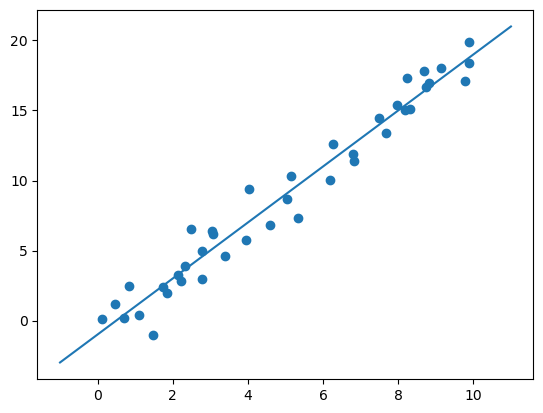

In [23]:
#plot the data and regression line
plt.scatter(x,y) #scatter plot of the data
plt.plot(xfit, yfit) #plot regression line
plt.show()

# Unsupervised Learning in sklearn

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

X_iris = iris.drop('species', axis = 1)
y_iris = iris['species']



### PCA -> principle component analysis

PCA is used for dimensionality reduction — reducing the number of features while keeping the most important information (variance).

In [28]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)

PCA(n_components=2)

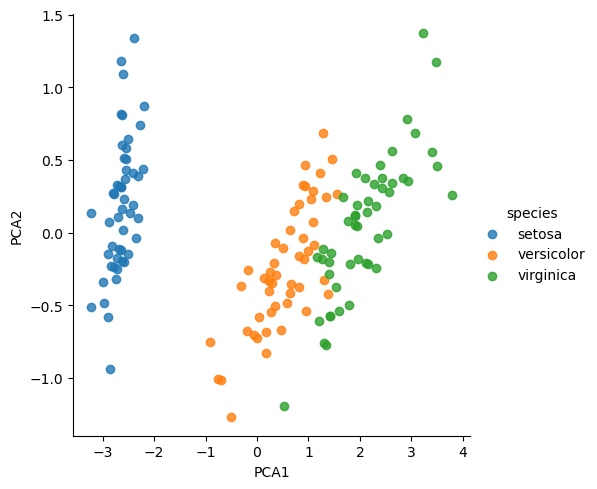

In [29]:
X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

sns.lmplot(x="PCA1",y="PCA2",hue="species",data=iris,fit_reg=False)